In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn import linear_model,model_selection,metrics,tree,ensemble,neighbors,svm,naive_bayes

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import statsmodels.api as sms

In [7]:
car=pd.read_excel('car data.xlsx',header=None,names=['buying','maint','doors','persons','lug_boot','safety','assessment'])

In [8]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,assessment
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
car.shape

(1728, 7)

In [10]:
any(car.duplicated())

False

In [11]:
car.apply(lambda x:sum(x.isnull()))

buying        0
maint         0
doors         0
persons       0
lug_boot      0
safety        0
assessment    0
dtype: int64

In [12]:
car.dtypes

buying        object
maint         object
doors         object
persons       object
lug_boot      object
safety        object
assessment    object
dtype: object

In [13]:
car[['doors','persons']]=car[['doors','persons']].astype('category')

In [14]:
for i,item in car.drop('assessment',axis=1).iteritems():
    car[i]=pd.factorize(item)[0]

In [15]:
car.dtypes

buying         int64
maint          int64
doors          int64
persons        int64
lug_boot       int64
safety         int64
assessment    object
dtype: object

In [16]:
car[car.columns[-1]].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: assessment, dtype: int64

In [17]:
prediction=car.columns[:-1]

In [18]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(car[prediction],car.assessment,test_size=0.2,random_state=1234)

In [30]:
y_train

1571    unacc
832       acc
1302    unacc
1068    unacc
535     unacc
257       acc
489     unacc
618     unacc
1451      acc
183     unacc
905       acc
1255     good
637       acc
1390      acc
642     unacc
0       unacc
632       acc
875       acc
180     unacc
602     unacc
719       acc
69      unacc
980     unacc
1587    unacc
1035    unacc
1372      acc
587       acc
570     unacc
956       acc
1112    unacc
        ...  
1530    unacc
293       acc
1100    unacc
1586     good
1455    unacc
510     unacc
246     unacc
383     unacc
969     unacc
1360    unacc
1349      acc
1500    unacc
120     unacc
442     unacc
1398    unacc
1182    unacc
1707    unacc
30      unacc
1178    vgood
1257    unacc
279     unacc
689       acc
1679    unacc
664       acc
1396    unacc
1228      acc
1077    unacc
1318    unacc
723     unacc
815     unacc
Name: assessment, Length: 1382, dtype: object

In [26]:
y1=np.where(y_train=='unacc',1,0)

In [27]:
y1

array([1, 0, 1, ..., 1, 1, 1])

In [32]:
logit_test=sms.Logit(y1,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.606250
         Iterations 5


In [35]:
class1=logit_test.predict(x_train)

In [38]:
logit_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1382
Model:                          Logit   Df Residuals:                     1376
Method:                           MLE   Df Model:                            5
Date:                Fri, 05 Jul 2019   Pseudo R-squ.:              -0.0001944
Time:                        15:45:50   Log-Likelihood:                -837.84
converged:                       True   LL-Null:                       -837.68
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
buying         0.1555      0.048      3.226      0.001       0.061       0.250
maint          0.1762      0.048      3.651      0.000       0.082       0.271
doors          0.4044      0.049      8.172      0.000       0.307       0.501
persons       -0.3286      0.067     -4.893      0.000      -0.460      -0.197
lug_boot       0.3059      0.067      4.535      0.000       0.174       0.438
safety        -0.5542      0.068     -8.099      0.000      -0.688      -0.420
==============================================================================
"""

In [36]:
y2=np.where(y_train=='acc',1,0)

In [37]:
logit2=sms.Logit

array([0, 1, 0, ..., 0, 0, 0])

In [20]:
#logistic 

In [19]:
logistic_model=linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=10000)

In [20]:
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
logistic_pred=logistic_model.predict(x_test)

In [22]:
print("logistic_model准确率:",metrics.accuracy_score(y_test,logistic_pred))

logistic_model准确率: 0.8236994219653179


In [23]:
print('logistic模型参数:\n',logistic_model.intercept_,logistic_model.coef_)

logistic模型参数:
 [  6.89914563  -6.9997281   16.4188948  -16.31831232] [[-0.91591127 -0.70030347 -0.12430128 -0.10114038 -0.4466385  -0.73407023]
 [ 1.01005128  1.18297215  0.08414849  0.7947486   0.08291244  0.38450029]
 [-1.58698444 -1.34346803 -0.33566941 -2.18524126 -1.15370396 -3.12382349]
 [ 1.49284443  0.86079935  0.3758222   1.49163304  1.51743001  3.47339344]]


In [24]:
logistic_model.predict_proba(x_test)

array([[5.62401461e-03, 1.24824940e-06, 9.94374734e-01, 3.31870676e-09],
       [1.56492031e-01, 3.24876508e-05, 8.43475033e-01, 4.48335343e-07],
       [2.72497178e-02, 7.74686821e-05, 9.72671444e-01, 1.36940064e-06],
       ...,
       [1.20777147e-01, 1.74933572e-05, 8.79202898e-01, 2.46132762e-06],
       [5.99278823e-01, 1.11774838e-01, 3.67566205e-02, 2.52189718e-01],
       [1.20168644e-01, 2.39292047e-03, 8.77427233e-01, 1.12029679e-05]])

In [69]:
pd.Series(logistic_pred).value_counts()

unacc    266
acc       57
vgood     14
good       9
dtype: int64

In [27]:
sm=pd.crosstab(logistic_pred,y_test)

In [28]:
cm=pd.DataFrame(sm)

In [29]:
cm.index.name='predict'

In [30]:
cm.columns.name='real'

In [31]:
cm

real,acc,good,unacc,vgood
predict,,,,
acc,42,4,10,2
good,0,9,0,0
unacc,41,1,223,0
vgood,2,0,2,10


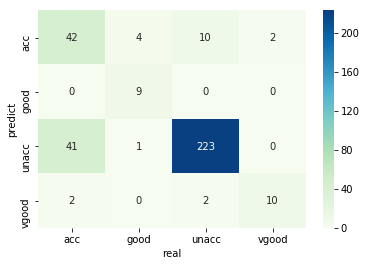

In [71]:
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')

In [35]:
print(metrics.classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

         acc       0.72      0.49      0.59        85
        good       1.00      0.64      0.78        14
       unacc       0.84      0.95      0.89       235
       vgood       0.71      0.83      0.77        12

   micro avg       0.82      0.82      0.82       346
   macro avg       0.82      0.73      0.76       346
weighted avg       0.81      0.82      0.81       346



In [74]:
#decisiontree

In [36]:
max_depth=[2,3,4,5,6,7,8]

In [37]:
min_samples_split=[2,4,6,8]

In [38]:
min_samples_leaf=[2,4,6,8,12]

In [39]:
parms={'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [40]:
grich_model=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(),param_grid=parms,cv=10)

In [41]:
grich_model.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [2, 4, 6, 8, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
grich_model.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [43]:
tree_model=tree.DecisionTreeClassifier(max_depth=8,min_samples_leaf=2,min_samples_split=4,random_state=1234)

In [44]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [45]:
tree_pred=tree_model.predict(x_test)

In [46]:
metrics.accuracy_score(y_test,tree_pred)

0.9566473988439307

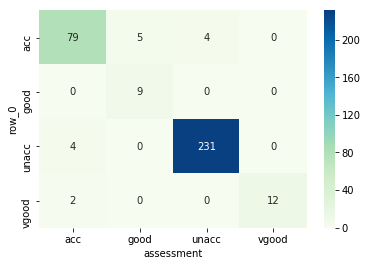

In [47]:
sns.heatmap(pd.DataFrame(pd.crosstab(tree_pred,y_test)),cmap='GnBu',annot=True,fmt='d')

In [48]:
print(metrics.classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

         acc       0.90      0.93      0.91        85
        good       1.00      0.64      0.78        14
       unacc       0.98      0.98      0.98       235
       vgood       0.86      1.00      0.92        12

   micro avg       0.96      0.96      0.96       346
   macro avg       0.93      0.89      0.90       346
weighted avg       0.96      0.96      0.96       346



In [102]:
#randomtforest

In [49]:
forest_model=ensemble.RandomForestClassifier(n_estimators=100,random_state=1234)

In [50]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [51]:
forest_pred=forest_model.predict(x_test)

In [52]:
metrics.accuracy_score(y_test,forest_pred)

0.9855491329479769

In [53]:
print(metrics.classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

         acc       0.97      0.98      0.97        85
        good       0.92      0.86      0.89        14
       unacc       1.00      1.00      1.00       235
       vgood       1.00      1.00      1.00        12

   micro avg       0.99      0.99      0.99       346
   macro avg       0.97      0.96      0.96       346
weighted avg       0.99      0.99      0.99       346



In [54]:
cm1=pd.DataFrame(pd.crosstab(forest_pred,y_test))

In [55]:
cm1.index.name='predict'

In [56]:
cm1.columns.name='real'

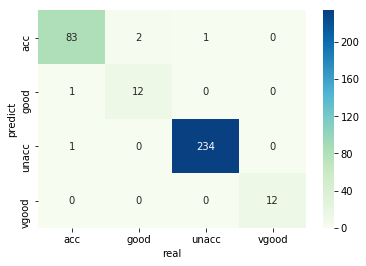

In [57]:
sns.heatmap(cm1,annot=True,fmt='d',cmap='GnBu')

In [58]:
forest_model.feature_importances_

array([0.16484997, 0.14360296, 0.05964339, 0.23725847, 0.09254605,
       0.30209916])

In [59]:
importance=pd.Series(forest_model.feature_importances_,index=x_train.columns).sort_values(ascending=False)

In [60]:
importances=importance.reset_index()

In [61]:
importances.columns=['a','b']

In [62]:
importances.sort_values(by='b',ascending=False)

,a,b
0,safety,0.302099
1,persons,0.237258
2,buying,0.164850
3,maint,0.143603
4,lug_boot,0.092546
5,doors,0.059643


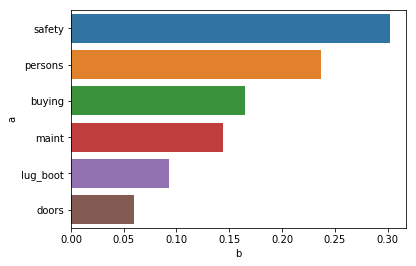

In [63]:
sns.barplot(y='a',x='b',data=importances)

In [134]:
#KNN

In [72]:
k=np.arange(1,np.ceil(np.log2(car.shape[0])))

In [73]:
result=[]    

In [74]:
for K in k:
    select_result=model_selection.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=int(K),weights='distance'),
                                    x_train,y_train,scoring='accuracy',cv=10)
    result.append(select_result.mean())

In [75]:
max_arg=np.array(result).argmax()

Text(6.0, 0.9507347392036687, 'the best k is 6')

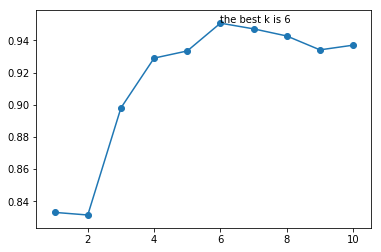

In [76]:
plt.plot(k,result)
plt.scatter(k,result)
plt.text(k[max_arg],result[max_arg],'the best k is %s'%int(k[max_arg]))

In [77]:
k=pd.Series(k).astype(int)

In [78]:
k=k.tolist()

In [79]:
params={'n_neighbors':k}

In [80]:
grid_kmodel=model_selection.GridSearchCV(estimator=neighbors.KNeighborsClassifier(weights='distance'),cv=10,param_grid=params,scoring='accuracy')

In [81]:
grid_kmodel.fit(x_train,y_train)

F:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [82]:
grid_kmodel.best_params_

{'n_neighbors': 6}

In [83]:
knn_model=neighbors.KNeighborsClassifier(n_neighbors=6,weights='distance')

In [84]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='distance')

In [85]:
knn_pred=knn_model.predict(x_test)

In [86]:
metrics.accuracy_score(y_test,knn_pred)

0.9364161849710982

In [87]:
print(metrics.classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

         acc       0.88      0.89      0.89        85
        good       0.67      0.57      0.62        14
       unacc       0.97      0.99      0.98       235
       vgood       1.00      0.58      0.74        12

   micro avg       0.94      0.94      0.94       346
   macro avg       0.88      0.76      0.81       346
weighted avg       0.94      0.94      0.93       346



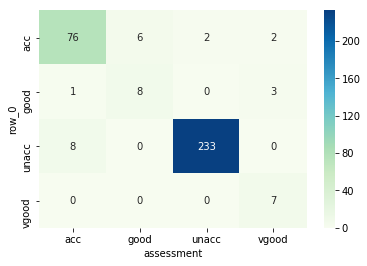

In [88]:
sns.heatmap(pd.DataFrame(pd.crosstab(knn_pred,y_test)),annot=True,fmt='d',cmap='GnBu')

In [ ]:
#naive_bayes

In [156]:
bayes_model=naive_bayes.MultinomialNB()

In [157]:
bayes_model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [158]:
bayes_pred=bayes_model.predict(x_test)

In [159]:
metrics.accuracy_score(y_test,bayes_pred)

0.6705202312138728

In [160]:
#对比logistic回归，分类决策树，随机森林分类，K最近邻模型信息，得出在这几个模型上分类该数据集最佳模型为随机森林，平均准确率达到98.5%，
#  平均覆盖率达99%

In [ ]:
#线性svc

In [18]:
C=np.arange(1,50)

In [117]:
linear_param={'C':C}

In [118]:
linear_grid=model_selection.GridSearchCV(estimator=svm.LinearSVC(),param_grid=linear_param,cv=5,scoring='accuracy',verbose=1,n_jobs=2)

In [119]:
linear_grid.fit(x_train,y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   17.7s
[Parallel(n_jobs=2)]: Done 245 out of 245 | elapsed:   21.9s finished
F:\anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [115]:
linear_grid.best_params_

{'C': 21}

In [126]:
linearsvc_model=svm.LinearSVC(C=21,class_weight='balanced')

In [127]:
linearsvc_model.fit(x_train,y_train)

F:\anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=21, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [128]:
linearsvc_pred=linearsvc_model.predict(x_test)

In [137]:
metrics.accuracy_score(y_test,linearsvc_pred)

0.8034682080924855

In [141]:
print(metrics.classification_report(y_test,linearsvc_pred))

              precision    recall  f1-score   support

         acc       0.71      0.49      0.58        85
        good       1.00      0.36      0.53        14
       unacc       0.85      0.94      0.89       235
       vgood       0.45      0.83      0.59        12

   micro avg       0.80      0.80      0.80       346
   macro avg       0.75      0.66      0.65       346
weighted avg       0.81      0.80      0.79       346



In [133]:
linearcv_cm=pd.DataFrame(pd.crosstab(linearsvc_pred,y_test))

In [134]:
linearcv_cm.index.name='predict'

In [135]:
linearcv_cm.columns.name='real'

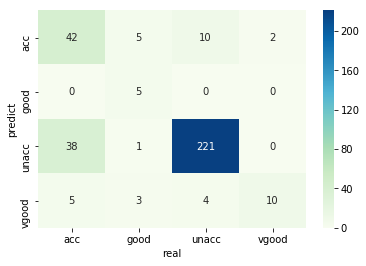

In [136]:
sns.heatmap(linearcv_cm,annot=True,cmap='GnBu',fmt='d')

In [ ]:
#svc

In [89]:
C=np.arange(1,50)

In [90]:
kernel=['rbf']

In [91]:
gamma=np.logspace(-1,2,10)

In [92]:
svc_param={'C':C,'kernel':kernel,'gamma':gamma}

In [93]:
svc_grid=model_selection.GridSearchCV(estimator=svm.SVC(),param_grid=svc_param,cv=5,scoring='accuracy',verbose=1,n_jobs=2)

In [94]:
svc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 490 candidates, totalling 2450 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.5s
[Parallel(n_jobs=2)]: Done 327 tasks      | elapsed:   29.0s
[Parallel(n_jobs=2)]: Done 827 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 1527 tasks      | elapsed:  2.1min
[Parallel(n_jobs=2)]: Done 2427 tasks      | elapsed:  3.2min
[Parallel(n_jobs=2)]: Done 2447 out of 2450 | elapsed:  3.3min remaining:    0.1s
[Parallel(n_jobs=2)]: Done 2450 out of 2450 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'kernel': ['rbf'], 'gamma': array([  0.1    ,   0.21544,   0.46416,   1.     ,   2.15443,   4.64159,
        10.     ,  21.54435,  46.41589, 100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [95]:
svc_grid.best_params_

{'C': 37, 'gamma': 0.1, 'kernel': 'rbf'}

In [96]:
svc_model=svm.SVC(C=37,kernel='rbf',gamma=0.1)

In [97]:
svc_model.fit(x_train,y_train)

SVC(C=37, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
SVC_pred=svc_model.predict(x_test)

In [99]:
metrics.accuracy_score(y_test,SVC_pred)

0.9797687861271677

In [100]:
print(metrics.classification_report(y_test,SVC_pred))

              precision    recall  f1-score   support

         acc       0.95      0.96      0.96        85
        good       1.00      0.79      0.88        14
       unacc       0.99      1.00      0.99       235
       vgood       1.00      1.00      1.00        12

   micro avg       0.98      0.98      0.98       346
   macro avg       0.99      0.94      0.96       346
weighted avg       0.98      0.98      0.98       346



In [ ]:
#gradientboostingregressor

In [161]:
learning_rate=np.arange(0.1,1.1,0.1)

In [162]:
n_estimators=[100,200,300]

In [163]:
gradient_param={'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'n_estimators':n_estimators,
               'learning_rate':learning_rate}

In [164]:
gradient_grid=model_selection.GridSearchCV(estimator=ensemble.GradientBoostingClassifier(),
                                           param_grid=gradient_param,cv=5,scoring='accuracy',verbose=1,n_jobs=4)

In [165]:
gradient_grid.fit(x_train,y_train)

Fitting 5 folds for each of 4200 candidates, totalling 21000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  9.2min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 14.2min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 18.7min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 23.5min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 28.8min
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed: 33.9min
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed: 39.4min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed: 45.3min
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed: 51.1min
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed: 57.3min
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed: 63.9mi

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [2, 4, 6, 8, 12], 'n_estimators': [100, 200, 300], 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [166]:
gradient_grid.best_params_

{'learning_rate': 0.9,
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [167]:
gradient_model=ensemble.GradientBoostingClassifier(n_estimators=300,max_depth=2,min_samples_leaf=2,min_samples_split=2,learning_rate=0.9)

In [168]:
gradient_model.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.9, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [169]:
gradient_pred=gradient_model.predict(x_test)

In [170]:
metrics.accuracy_score(y_test,gradient_pred)

0.9884393063583815

In [172]:
print(metrics.classification_report(y_test,gradient_pred))

              precision    recall  f1-score   support

         acc       0.98      0.99      0.98        85
        good       0.86      0.86      0.86        14
       unacc       1.00      1.00      1.00       235
       vgood       1.00      0.92      0.96        12

   micro avg       0.99      0.99      0.99       346
   macro avg       0.96      0.94      0.95       346
weighted avg       0.99      0.99      0.99       346



In [173]:
gra_cm=pd.DataFrame(pd.crosstab(gradient_pred,y_test))

In [174]:
gra_cm.index.name='predict'

In [175]:
gra_cm.columns.name='real'

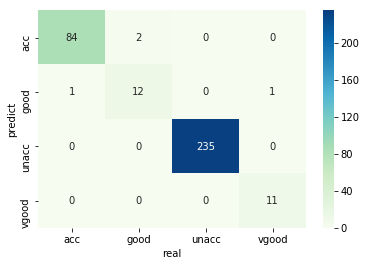

In [177]:
sns.heatmap(gra_cm,annot=True,fmt='d',cmap='GnBu')

In [184]:
gra_importance=pd.Series(gradient_model.feature_importances_,index=x_train.columns).sort_values()

F:\anaconda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


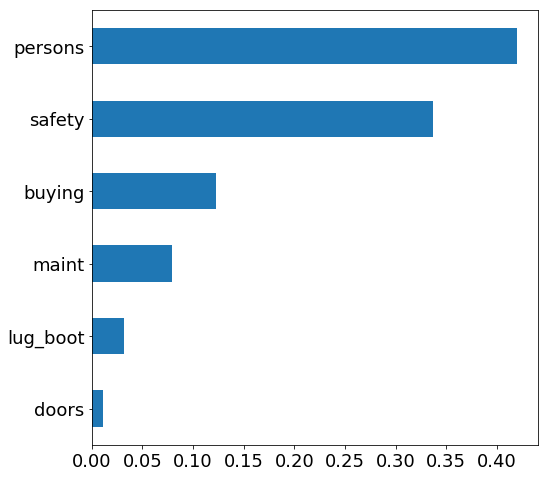

In [188]:
gra_importance.plot('barh',figsize=(8,8),fontsize=18)

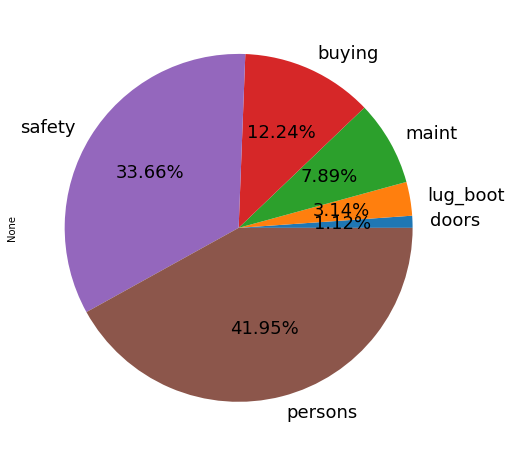

In [195]:
gra_importance.plot(kind='pie',autopct='%.2f%%',figsize=(8,8),fontsize=18)